# Importing The Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/DS Practice - Mohamed Ayman Mohamed  - 900182267/Case Studies/The Complete Pokemon/pokemon.csv'
df = pd.read_csv(path)

# 0 Understanding the Data and Defining the Problem

- This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc.


- Content
  - name: The English name of the Pokemon
  - japanese_name: The Original Japanese name of the Pokemon
  -pokedex_number: The entry number of the Pokemon in the National Pokedex
  -percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
  -type1: The Primary Type of the Pokemon
  -type2: The Secondary Type of the Pokemon
  -classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
  -height_m: Height of the Pokemon in metres
  -weight_kg: The Weight of the Pokemon in kilograms
  - capture_rate: Capture Rate of the Pokemon
  -baseeggsteps: The number of steps required to hatch an egg of the Pokemon
  -abilities: A stringified list of abilities that the Pokemon is capable of having
  -experience_growth: The Experience Growth of the Pokemon
  -base_happiness: Base Happiness of the Pokemon
  -against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
  -hp: The Base HP of the Pokemon
  -attack: The Base Attack of the Pokemon
  -defense: The Base Defense of the Pokemon
  -sp_attack: The Base Special Attack of the Pokemon
  -sp_defense: The Base Special Defense of the Pokemon
  -speed: The Base Speed of the Pokemon
  -generation: The numbered generation which the Pokemon was first introduced
  -is_legendary: Denotes if the Pokemon is legendary.


 **Defining The problem:**

  - Generally Speaking, we need to check whether the Pokeman is Legendary or not, so ,in a sense, it is a classification problem.

In [ ]:
df.shape

(801, 41)

We can notice that 
1. **type 2** has 384 Missing values. Since the data is quite small, we would prefer to remove this feature.
2. **percentage_male** has 98 missing values, so I guess it is also preferred to be removed. 
3. Height and Weight are important features, so we can impute missing values.

In [ ]:
print(df.isnull().sum()[df.columns[df.isnull().any()]])
print("Total Missing values : ",df.isna().sum().sum())

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64
Total Missing values :  522


In [ ]:
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [ ]:
def ExploringTheData(df):
  print("The Shape: ",df.shape)
  print("Simple Description of The Data: ", df.describe().T)
  print("The Number of Duplicate Data:",df.duplicated().sum())
  print("Check the Null values for each feature")
  print("Feature Name:      Value")
  print(df.isnull().sum())


In [ ]:
ExploringTheData(df)

The Shape:  (801, 41)
Simple Description of The Data:                     count          mean            std        min        25%  \
against_bug        801.0  9.962547e-01       0.597248       0.25        0.5   
against_dark       801.0  1.057116e+00       0.438142       0.25        1.0   
against_dragon     801.0  9.687890e-01       0.353058       0.00        1.0   
against_electric   801.0  1.073970e+00       0.654962       0.00        0.5   
against_fairy      801.0  1.068976e+00       0.522167       0.25        1.0   
against_fight      801.0  1.065543e+00       0.717251       0.00        0.5   
against_fire       801.0  1.135456e+00       0.691853       0.25        0.5   
against_flying     801.0  1.192884e+00       0.604488       0.25        1.0   
against_ghost      801.0  9.850187e-01       0.558256       0.00        1.0   
against_grass      801.0  1.034020e+00       0.788896       0.25        0.5   
against_ground     801.0  1.098002e+00       0.738818       0.00        1.0 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

abilities: Number of unique values 482
against_bug: Number of unique values 5
against_dark: Number of unique values 5
against_dragon: Number of unique values 4
against_electric: Number of unique values 6
against_fairy: Number of unique values 5
against_fight: Number of unique values 6
against_fire: Number of unique values 5
against_flying: Number of unique values 5
against_ghost: Number of unique values 5
against_grass: Number of unique values 5
against_ground: Number of unique values 6
against_ice: Number of unique values 5
against_normal: Number of unique values 4
against_poison: Number of unique values 6
against_psychic: Number of unique values 6
against_rock: Number of unique values 5
against_steel: Number of unique values 5
against_water: Number of unique values 5
attack: Number of unique values 114
base_egg_steps: Number of unique values 10
base_happiness: Number of unique values 6
base_total: Number of unique values 203
capture_rate: Number of unique values 34
classfication: Num

In [ ]:
#Check the Values which has one unique value
columnsHavingOneValue = []
for column in df.columns:
  if(df[column].nunique() == 1):
    columnsHavingOneValue.append(column)
columnsHavingOneValue

[]

**Check the unique of attrition and its distribution** 

In [ ]:
df['is_legendary'].unique()

array([0, 1])

In [ ]:
df['is_legendary'].value_counts()


0    731
1     70
Name: is_legendary, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff22092c390>,
 [Text(-1.6363321394928452, 0.4608873281646695, 'No'),
  Text(1.6844595220448697, -0.4744429560994342, 'Yes')],
 [Text(-0.9144209014812957, 0.2575546833861388, '91.3%'),
  Text(0.9625482983113539, -0.27111026062824806, '8.7%')])

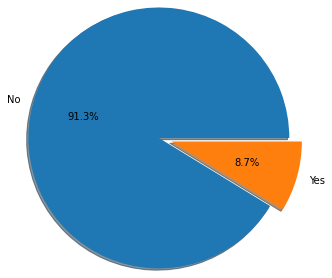

In [ ]:
r = df.groupby('is_legendary')['is_legendary'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True)

- It is easy to notice that the data is completely imbalanced

More detailed, If we depend on this data, the machine learning algorithms will be somehow baised since the 8.7% of pokemons are legendary. In this sense the target variable is imbalance, so we need to increase this data. As far as I know, there are multiple solutions to overcome the imbalanced data problem, like Oversampling, undersampling, and SMOTE technique. In the end, I will train over the data with and without balancing the data.



# 1.Handling the Missing Values and Categorical Features

- As mentioned earlier, I will remove the features type_2 and percentage_male. However, the height and weight will be imputed.

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.drop('type2',inplace = True, axis = 1)
df_copy.drop('percentage_male',inplace = True, axis = 1)


Before Imputing, we need to handle the categorical features and delete unnecessary features

- Japanese name does not make sense to leave it because each one has a unique name (810 names for 810 examples.
- Name also is not needed for the same reason as japanese name. 
- Pokdex_number looks like and ID, so we do not need them.
- classfication: we have 588 different classfication out of 810 examples. This blurrs the data. 

In [ ]:
df_copy['pokedex_number'].unique().shape

(801,)

In [ ]:
df_copy['classfication'].unique().shape

(588,)

In [ ]:
df_copy['name'].unique().shape

(801,)

In [ ]:
df_copy.drop(columns=['japanese_name', 'pokedex_number','classfication', 'name'], axis=1, inplace=True)


In [ ]:
#knowing the categorical and numerical features
numeric_columns = list(df_copy.select_dtypes(include=np.number).columns)
categorical_columns = list(df_copy.select_dtypes(include="object").columns)
categorical_columns

['abilities', 'capture_rate', 'type1']

In [ ]:
print(df_copy['abilities'].unique().shape)

(482,)


In [ ]:
print(df_copy['capture_rate'].unique())

['45' '255' '120' '127' '90' '190' '75' '235' '150' '25' '170' '50' '200'
 '100' '180' '60' '225' '30' '35' '3' '65' '70' '125' '205' '155' '145'
 '130' '140' '15' '220' '160' '80' '55' '30 (Meteorite)255 (Core)']


In [ ]:
print(df_copy['type1'].unique())

['grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric' 'ground'
 'fairy' 'fighting' 'psychic' 'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel'
 'flying']


- From above, we can see that type1 needs to be converted to meaningfully numerical representation using dummy encoding. 
- Capture_rate are numbers, so we need to convert them to int. 
- abilities is a nominal feature, so I will use get dummies with it as well. 

In [ ]:
type1 = df['type1']

In [ ]:
df_copy[df_copy['capture_rate'] == '30 (Meteorite)255 (Core)']

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,experience_growth,height_m,hp,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
773,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,...,1059860,0.3,60,100,60,120,rock,40.0,7,0


In [ ]:

df_copy = df_copy.drop(773)


In [ ]:
df_copy.shape

(800, 35)

In [ ]:
df_copy['capture_rate'] = df_copy['capture_rate'].astype(int)


In [ ]:
#get_dummies the type1
df_copy = pd.get_dummies(df_copy, columns=['type1'], drop_first = True)


- Regarding the ability, we have 420 unique lists. This may cause of curse of dimensionality.
- If we convert them to unique words, we will have nearly 270 columns with many zeros. In this sense, I will change the abilities to the number of abilities.  

In [ ]:
def calculate(x):
  x = x[1:-1]
  # print(x)
  li = (x.split(","))
  return len(li)
df_copy['numberOfabilities'] = df_copy.apply(lambda data: calculate(data['abilities']) ,axis = 1)

In [ ]:
df_copy.drop('abilities',inplace = True, axis = 1)


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 800
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        800 non-null    float64
 1   against_dark       800 non-null    float64
 2   against_dragon     800 non-null    float64
 3   against_electric   800 non-null    float64
 4   against_fairy      800 non-null    float64
 5   against_fight      800 non-null    float64
 6   against_fire       800 non-null    float64
 7   against_flying     800 non-null    float64
 8   against_ghost      800 non-null    float64
 9   against_grass      800 non-null    float64
 10  against_ground     800 non-null    float64
 11  against_ice        800 non-null    float64
 12  against_normal     800 non-null    float64
 13  against_poison     800 non-null    float64
 14  against_psychic    800 non-null    float64
 15  against_rock       800 non-null    float64
 16  against_steel      800 non

In [ ]:
columns = df_copy.columns

In [ ]:
#impute the height and weight using 
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer()

In [ ]:
imputer.fit(df_copy)


KNNImputer()

In [ ]:
# fit on the dataset
# transform the dataset
df_copy = pd.DataFrame(imputer.transform(df_copy),columns = columns)

In [ ]:
df_copy.isnull().sum().sum()

0

In [ ]:
df_copy

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water,numberOfabilities
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
796,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
797,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
798,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df_copy['type1'] = type1 #I need it for visualization

# 2.Data Visualization

## 2.1 Interpret the categorical Features from visualizing the data

In [ ]:
!pip3 install arcticdata

In [ ]:
import arcticdata.ExploratoryDataAnalysis as eda


- Number of Pokemons per generation

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Generation')]

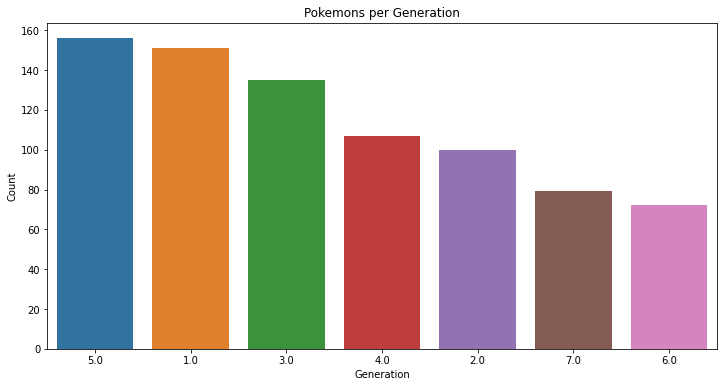

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='generation',data=df_copy,order=df_copy['generation'].value_counts().index)
ax.set_title('Pokemons per Generation')
ax.set(xlabel='Generation',ylabel='Count')

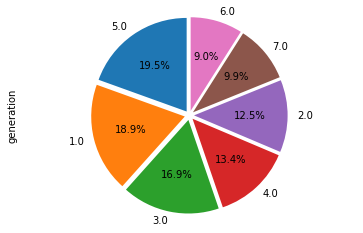

In [ ]:
pp = pd.value_counts(df_copy.generation)
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.axis('equal')
plt.show()

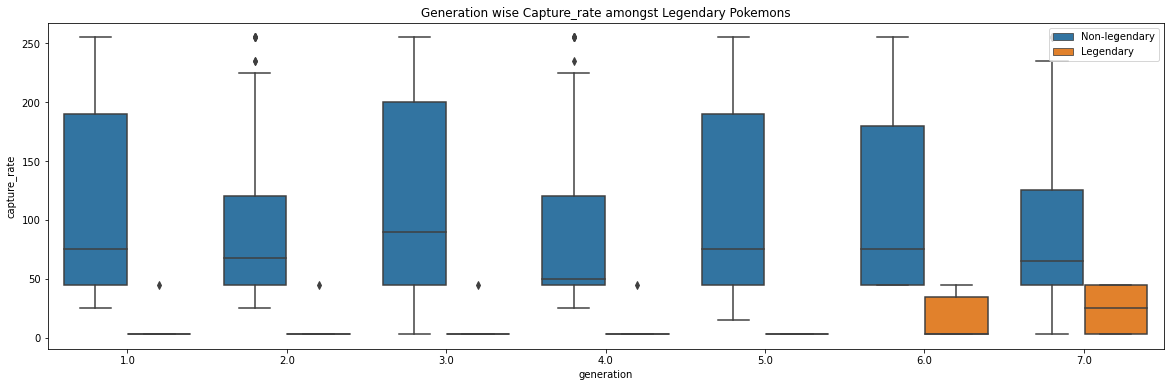

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.boxplot(x='generation',y='capture_rate',hue='is_legendary',data=df_copy)

ax.set_title("Generation wise Capture_rate amongst Legendary Pokemons")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,["Non-legendary", "Legendary"],loc='upper right')

- It is clear that legendary pokemons have low capture_rate.
- Legendary pokemons are with 6th and 7th generations compared to the others.

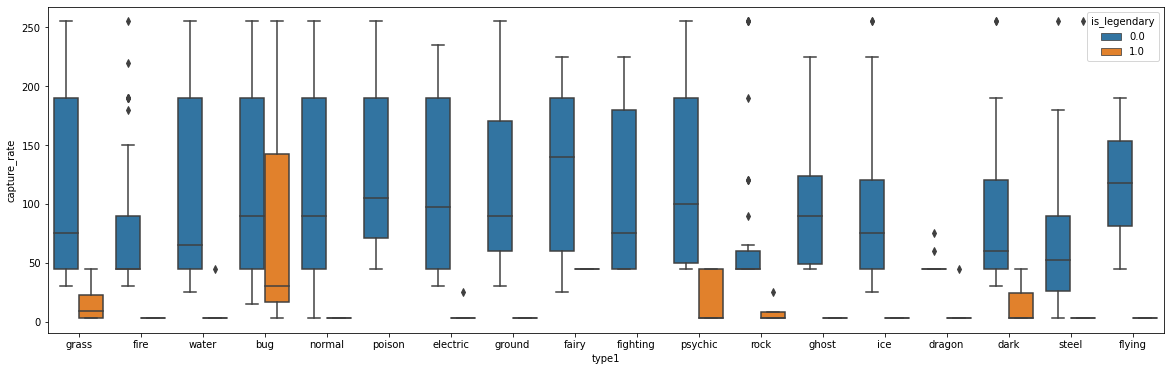

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x='type1',y='capture_rate',hue='is_legendary',data=df_copy)

**Conclusion:**
- 

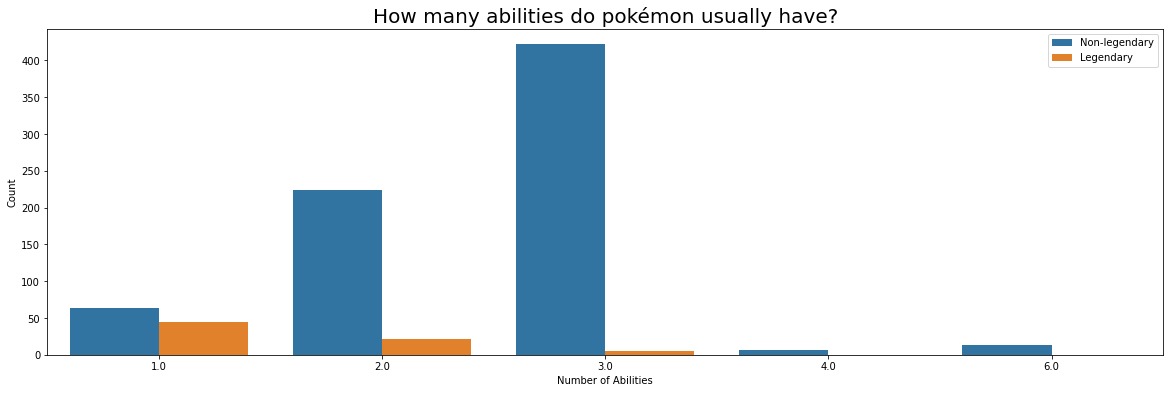

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot(data=df_copy, x="numberOfabilities", hue="is_legendary")
ax.set_title("How many abilities do pokémon usually have?", size=20)
ax.set(xlabel="Number of Abilities", ylabel="Count");
ax.legend(["Non-legendary", "Legendary"], loc='upper right');

- **Conclusion**: We can notice that the number of abilities is reversely proportional with the legendary attribute in the dependent variable 

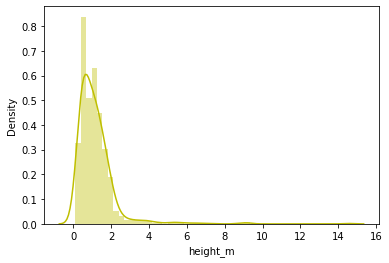

In [ ]:
ax_height = sns.distplot(df_copy['height_m'], color="y")

The feature height_m is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 31
-Outliers   3*IQR: 14


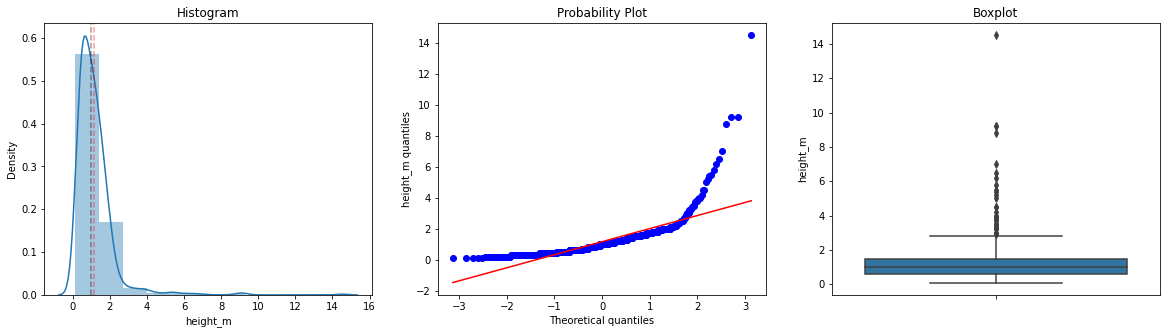

In [ ]:
eda.feature_analysis(df_copy,'height_m')

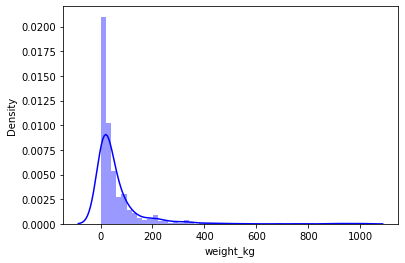

In [ ]:
ax_weight = sns.distplot(df_copy['weight_kg'], color="b")

The feature weight_kg is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 82
-Outliers   3*IQR: 39


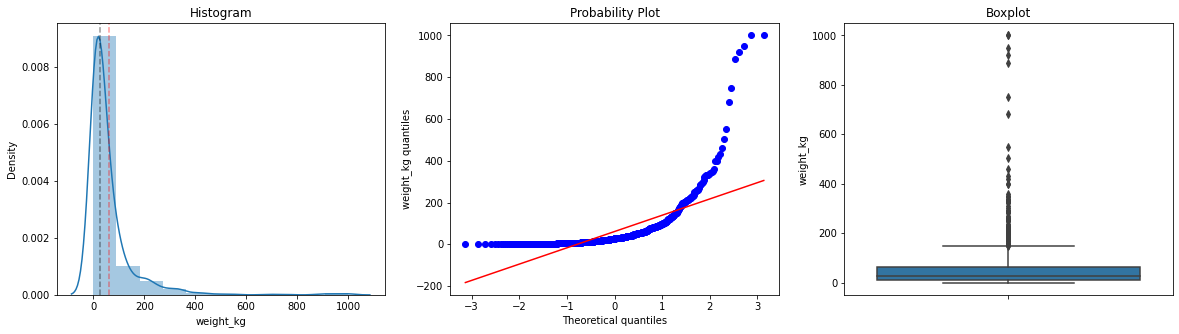

In [ ]:
eda.feature_analysis(df_copy,'weight_kg')

**Conclusion:** 
- The majority of pokemons have normal and normal height compared to the human scale.
- We need to handle all these outliers in outlier section 


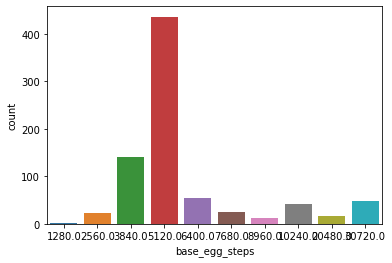

In [ ]:
#The number of steps required to hatch an egg of the Pokemon.

ax = sns.countplot(df_copy['base_egg_steps'])


- **Conclusion:** We can notice that the majority of Pokemons take 5120 steps to hatch.

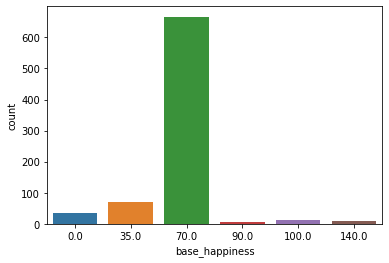

In [ ]:
ax = sns.countplot(df_copy['base_happiness'])

**Conclusion:** 
- The majority of Pokemons have 70 as index. 
- very rare people are very happy

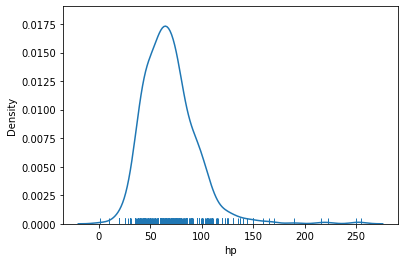

In [ ]:
ax = sns.distplot(df_copy['hp'], rug=True, hist=False)


The feature hp is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 22
-Outliers   3*IQR: 5


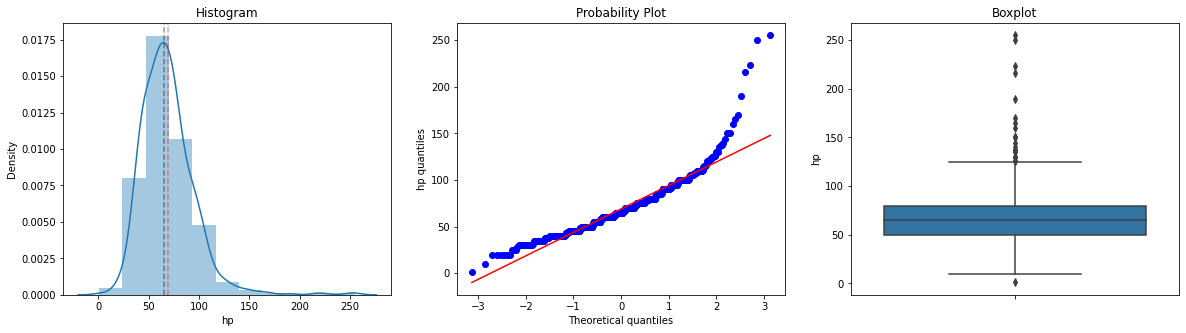

In [ ]:
eda.feature_analysis(df_copy,'hp')

**Conclusion**
- Most Pokemon have base hp in the range 25 - 150.
- We have also outliers with respect to this feature.

<h4>We need to check the defence and attack features</h4>

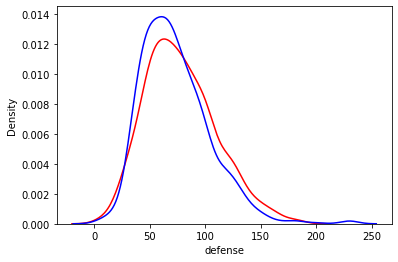

In [ ]:
ax_attack = sns.distplot(df_copy['attack'], color="r", hist=False)
ax_defense = sns.distplot(df_copy['defense'], color="b", hist=False)

The feature attack is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 5
-Outliers   3*IQR: 0


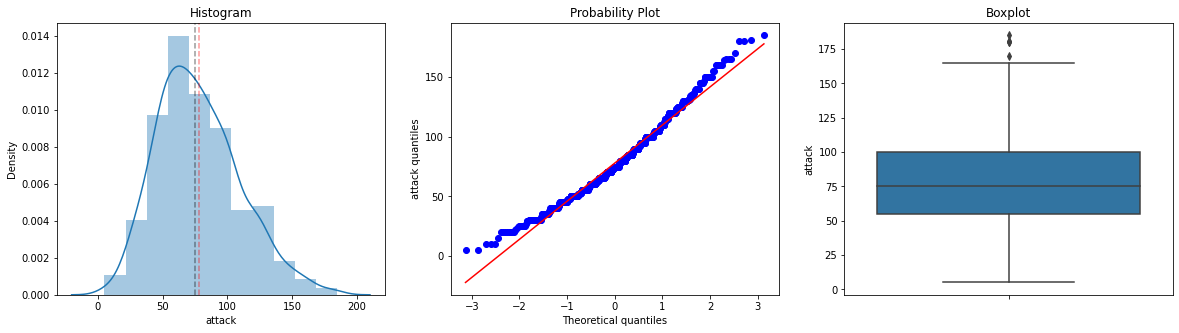

In [ ]:
eda.feature_analysis(df_copy,'attack')

The feature defense is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 11
-Outliers   3*IQR: 3


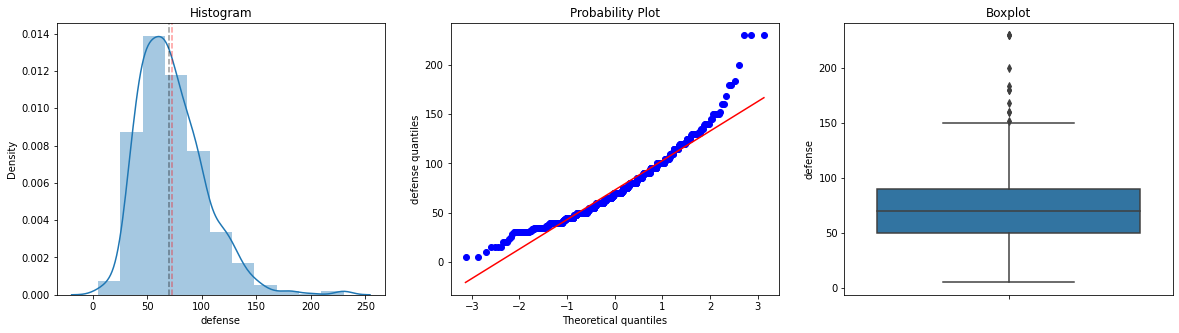

In [ ]:
eda.feature_analysis(df_copy,'defense')

**Conclusion**
- They follow the Normal distribution. 
- They have a little more defense ability more than attack. 


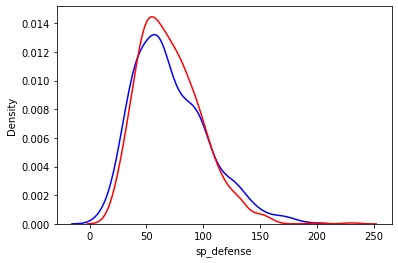

In [ ]:
ax_attack = sns.distplot(df_copy['sp_attack'], color="b", hist=False)
ax_defense = sns.distplot(df_copy['sp_defense'], color="r", hist=False)

The feature sp_attack is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 10
-Outliers   3*IQR: 0


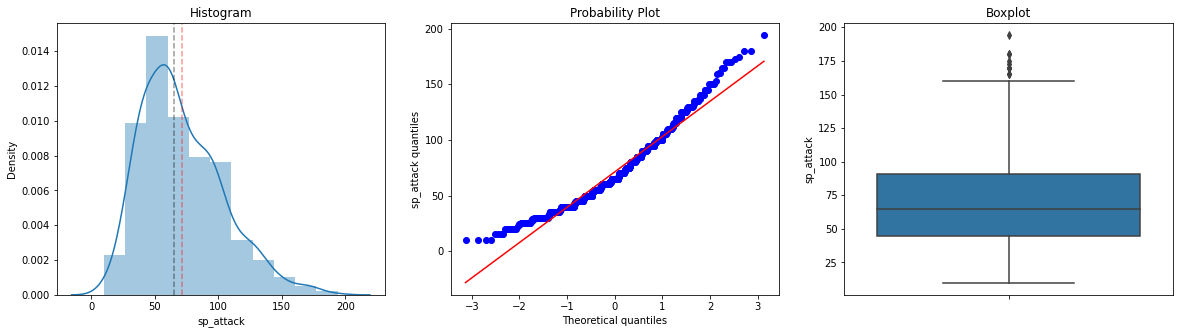

In [ ]:
eda.feature_analysis(df_copy,'sp_attack')

The feature sp_defense is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 6
-Outliers   3*IQR: 1


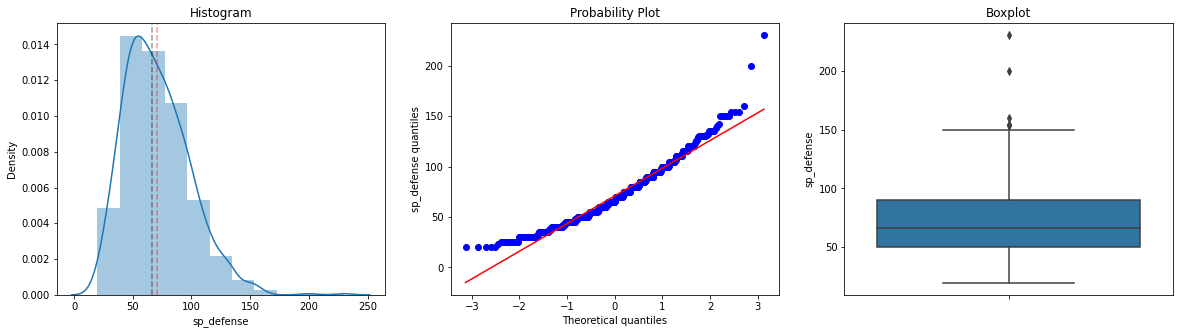

In [ ]:
eda.feature_analysis(df_copy,'sp_defense')

**Conclusion:**
- It has become clear to see that they have the strength of defense more than attack, even in sepcial attack and defense.

<h4>We need to check the relation between attack and sp_attack. Similarly, we need to see the defense and sp_defense</h4>

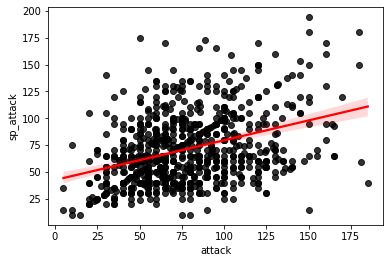

In [ ]:
sns.regplot(x = 'attack', y = 'sp_attack', data = df_copy,scatter_kws={"color": "black"}, line_kws={"color": "red"})


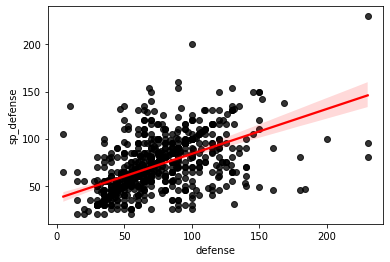

In [ ]:
sns.regplot(x = 'defense', y = 'sp_defense', data = df_copy,scatter_kws={"color": "black"}, line_kws={"color": "red"})


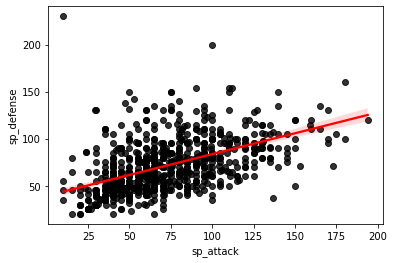

In [ ]:
sns.regplot(x = 'sp_attack', y = 'sp_defense', data = df_copy,scatter_kws={"color": "black"}, line_kws={"color": "red"})


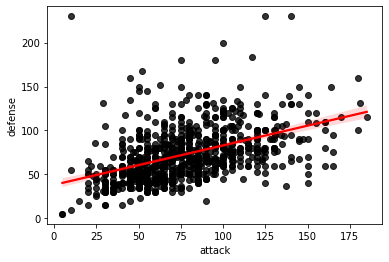

In [ ]:
sns.regplot(x = 'attack', y = 'defense', data = df_copy,scatter_kws={"color": "black"}, line_kws={"color": "red"})


**Conclusion:**
There is huge relationships between the features sp_attack, attack, defense, sp_defense. However, there are some outliers we need to take care of.

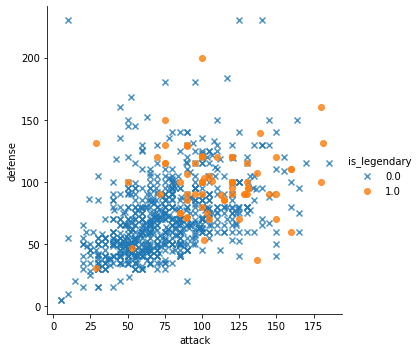

In [ ]:
sns.lmplot(x='attack', y='defense', hue='is_legendary', fit_reg=False, data=df_copy, markers = ['x', 'o'])

**Conclusion:**
Defense and Attack are important factors determining whether the pokemon is legendary or not.

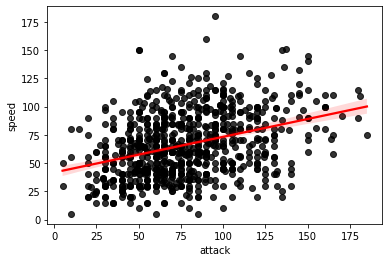

In [ ]:
sns.regplot(x = 'attack', y = 'speed', data = df_copy,scatter_kws={"color": "black"}, line_kws={"color": "red"})


- It makes sense that pokemon has a strong attack with respect to the speed. 

In [ ]:
cat_columns = ['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'base_egg_steps',
       'base_happiness','type1']

In [ ]:
len(cat_columns)

21

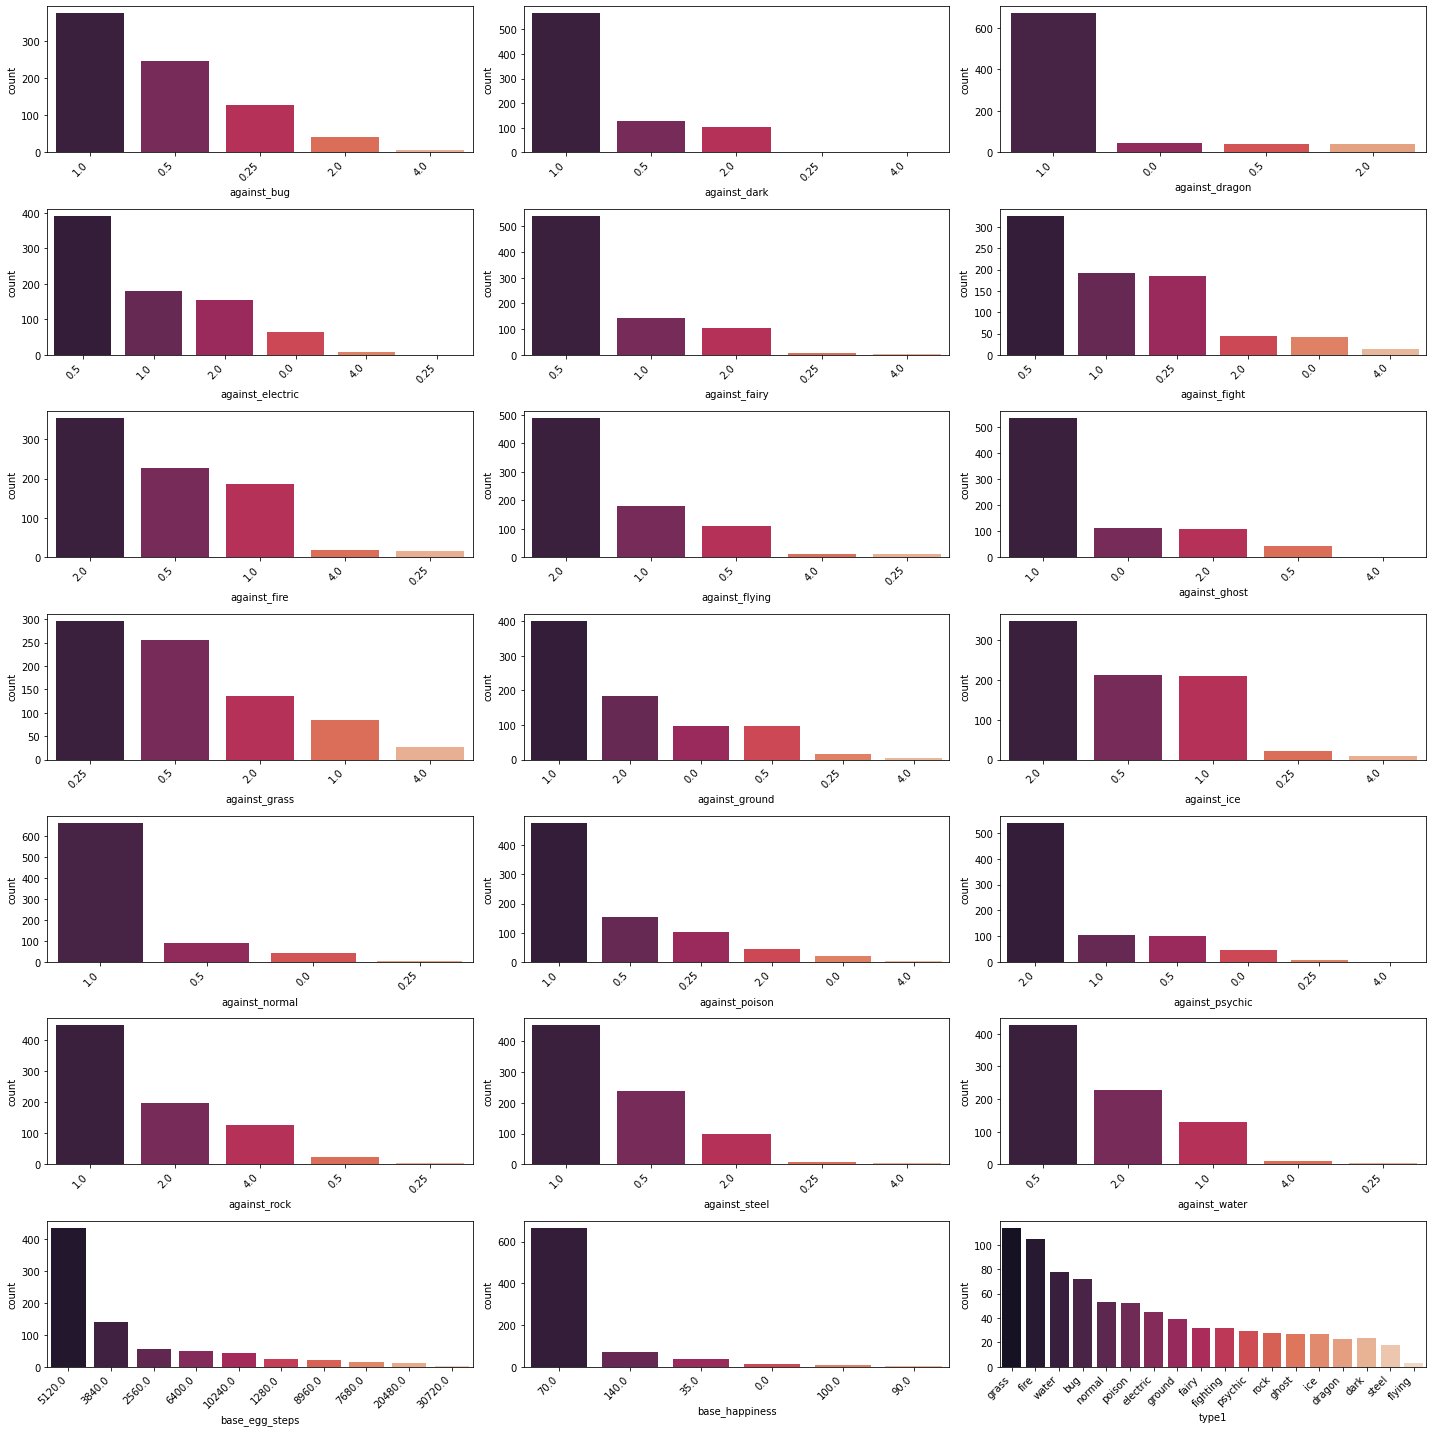

In [ ]:
fig, ax = plt.subplots(7,3, figsize = (20,20))

ax = np.ravel(ax)
for i in range(len(cat_columns)):
    sns.countplot(data = df, x = cat_columns[i], ax = ax[i], palette="rocket", order = df_copy[cat_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = df_copy[cat_columns[i]].unique(), rotation=45, ha='right')
ax = np.reshape(ax, (7,3))
plt.tight_layout()

**Important Conclusion**
- Pokemon are affected from against? by at least 1.

## 2.2 Visualize the Numerical Features For interpretation

In [ ]:
df_copy.base_happiness.unique()

array([ 70., 140.,  35.,   0., 100.,  90.])

In [ ]:
numeric_columns = ['attack', 'sp_attack', 'defense', 'sp_defense', 'weight_kg', 'speed', 'height_m','hp','capture_rate','base_total', 'base_egg_steps', 'experience_growth']

In [ ]:
len(numeric_columns)

12

In [ ]:
def make_distplot(df, col, ax):
    sns.distplot(df[col], ax = ax)
    ax.axvline(df[col].mean(), linestyle = '--', color = "red")
    ax.axvline(df[col].median(), linestyle = '--', color = "green")

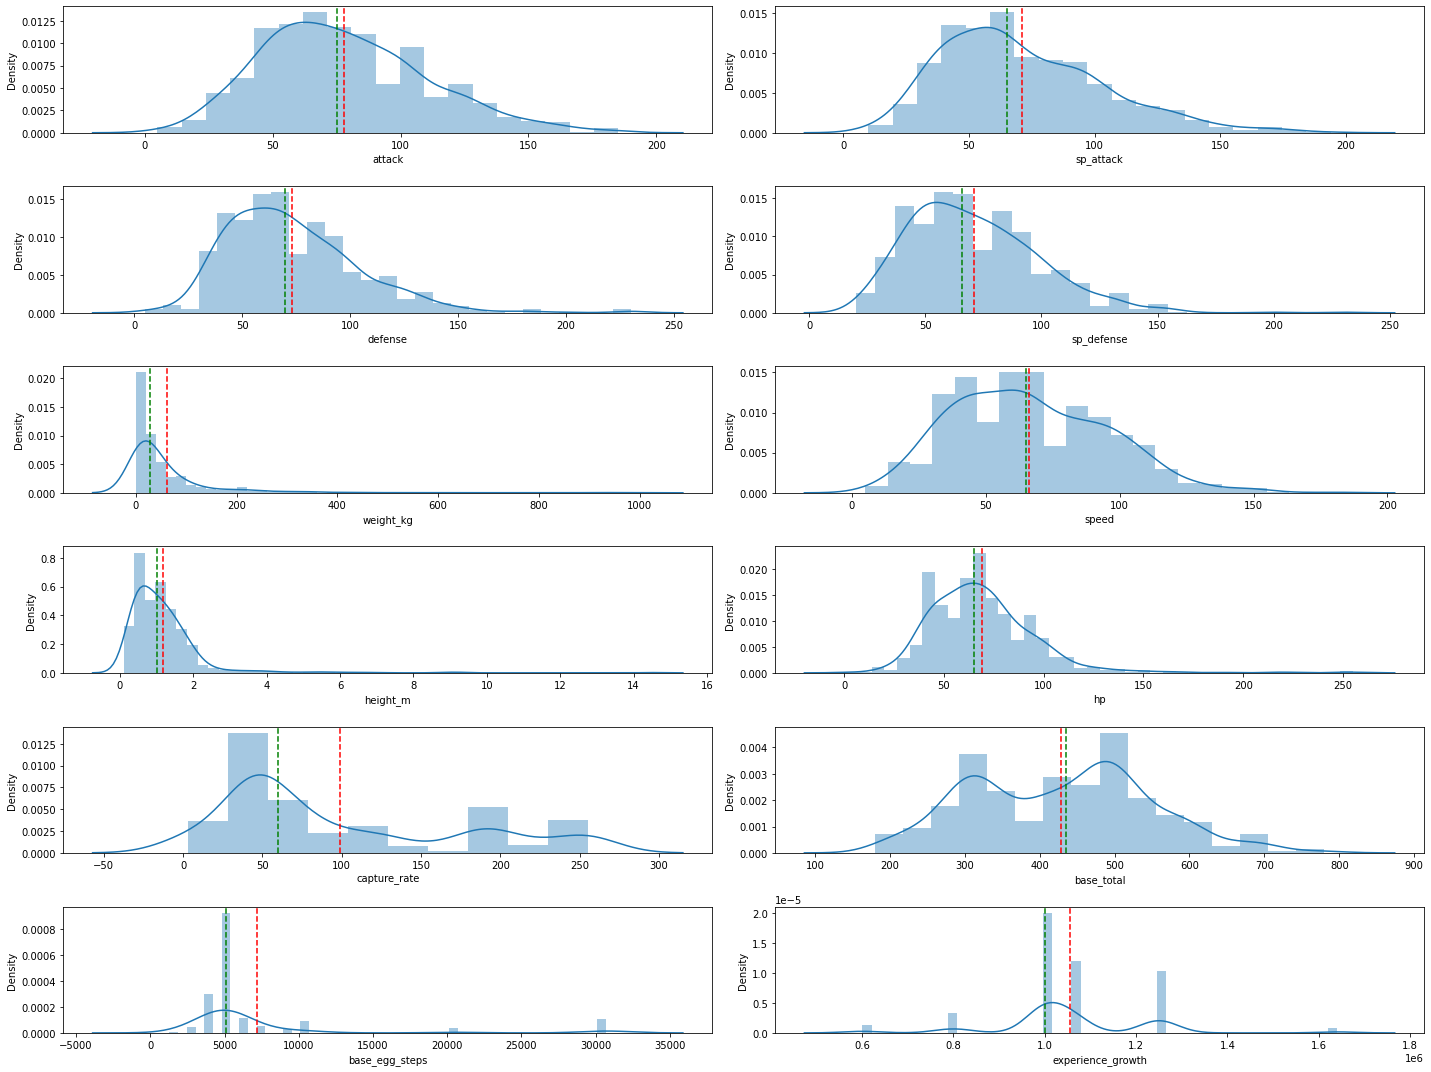

In [ ]:
fig, ax = plt.subplots(6,2, figsize = (20,15))

ax = np.ravel(ax)
for i in range(len(numeric_columns)):
    make_distplot(df_copy, numeric_columns[i], ax[i])
for i in range(len(numeric_columns), 6*2):
    ax[i].axis("off")
ax = np.reshape(ax, (6, 2))
plt.tight_layout()

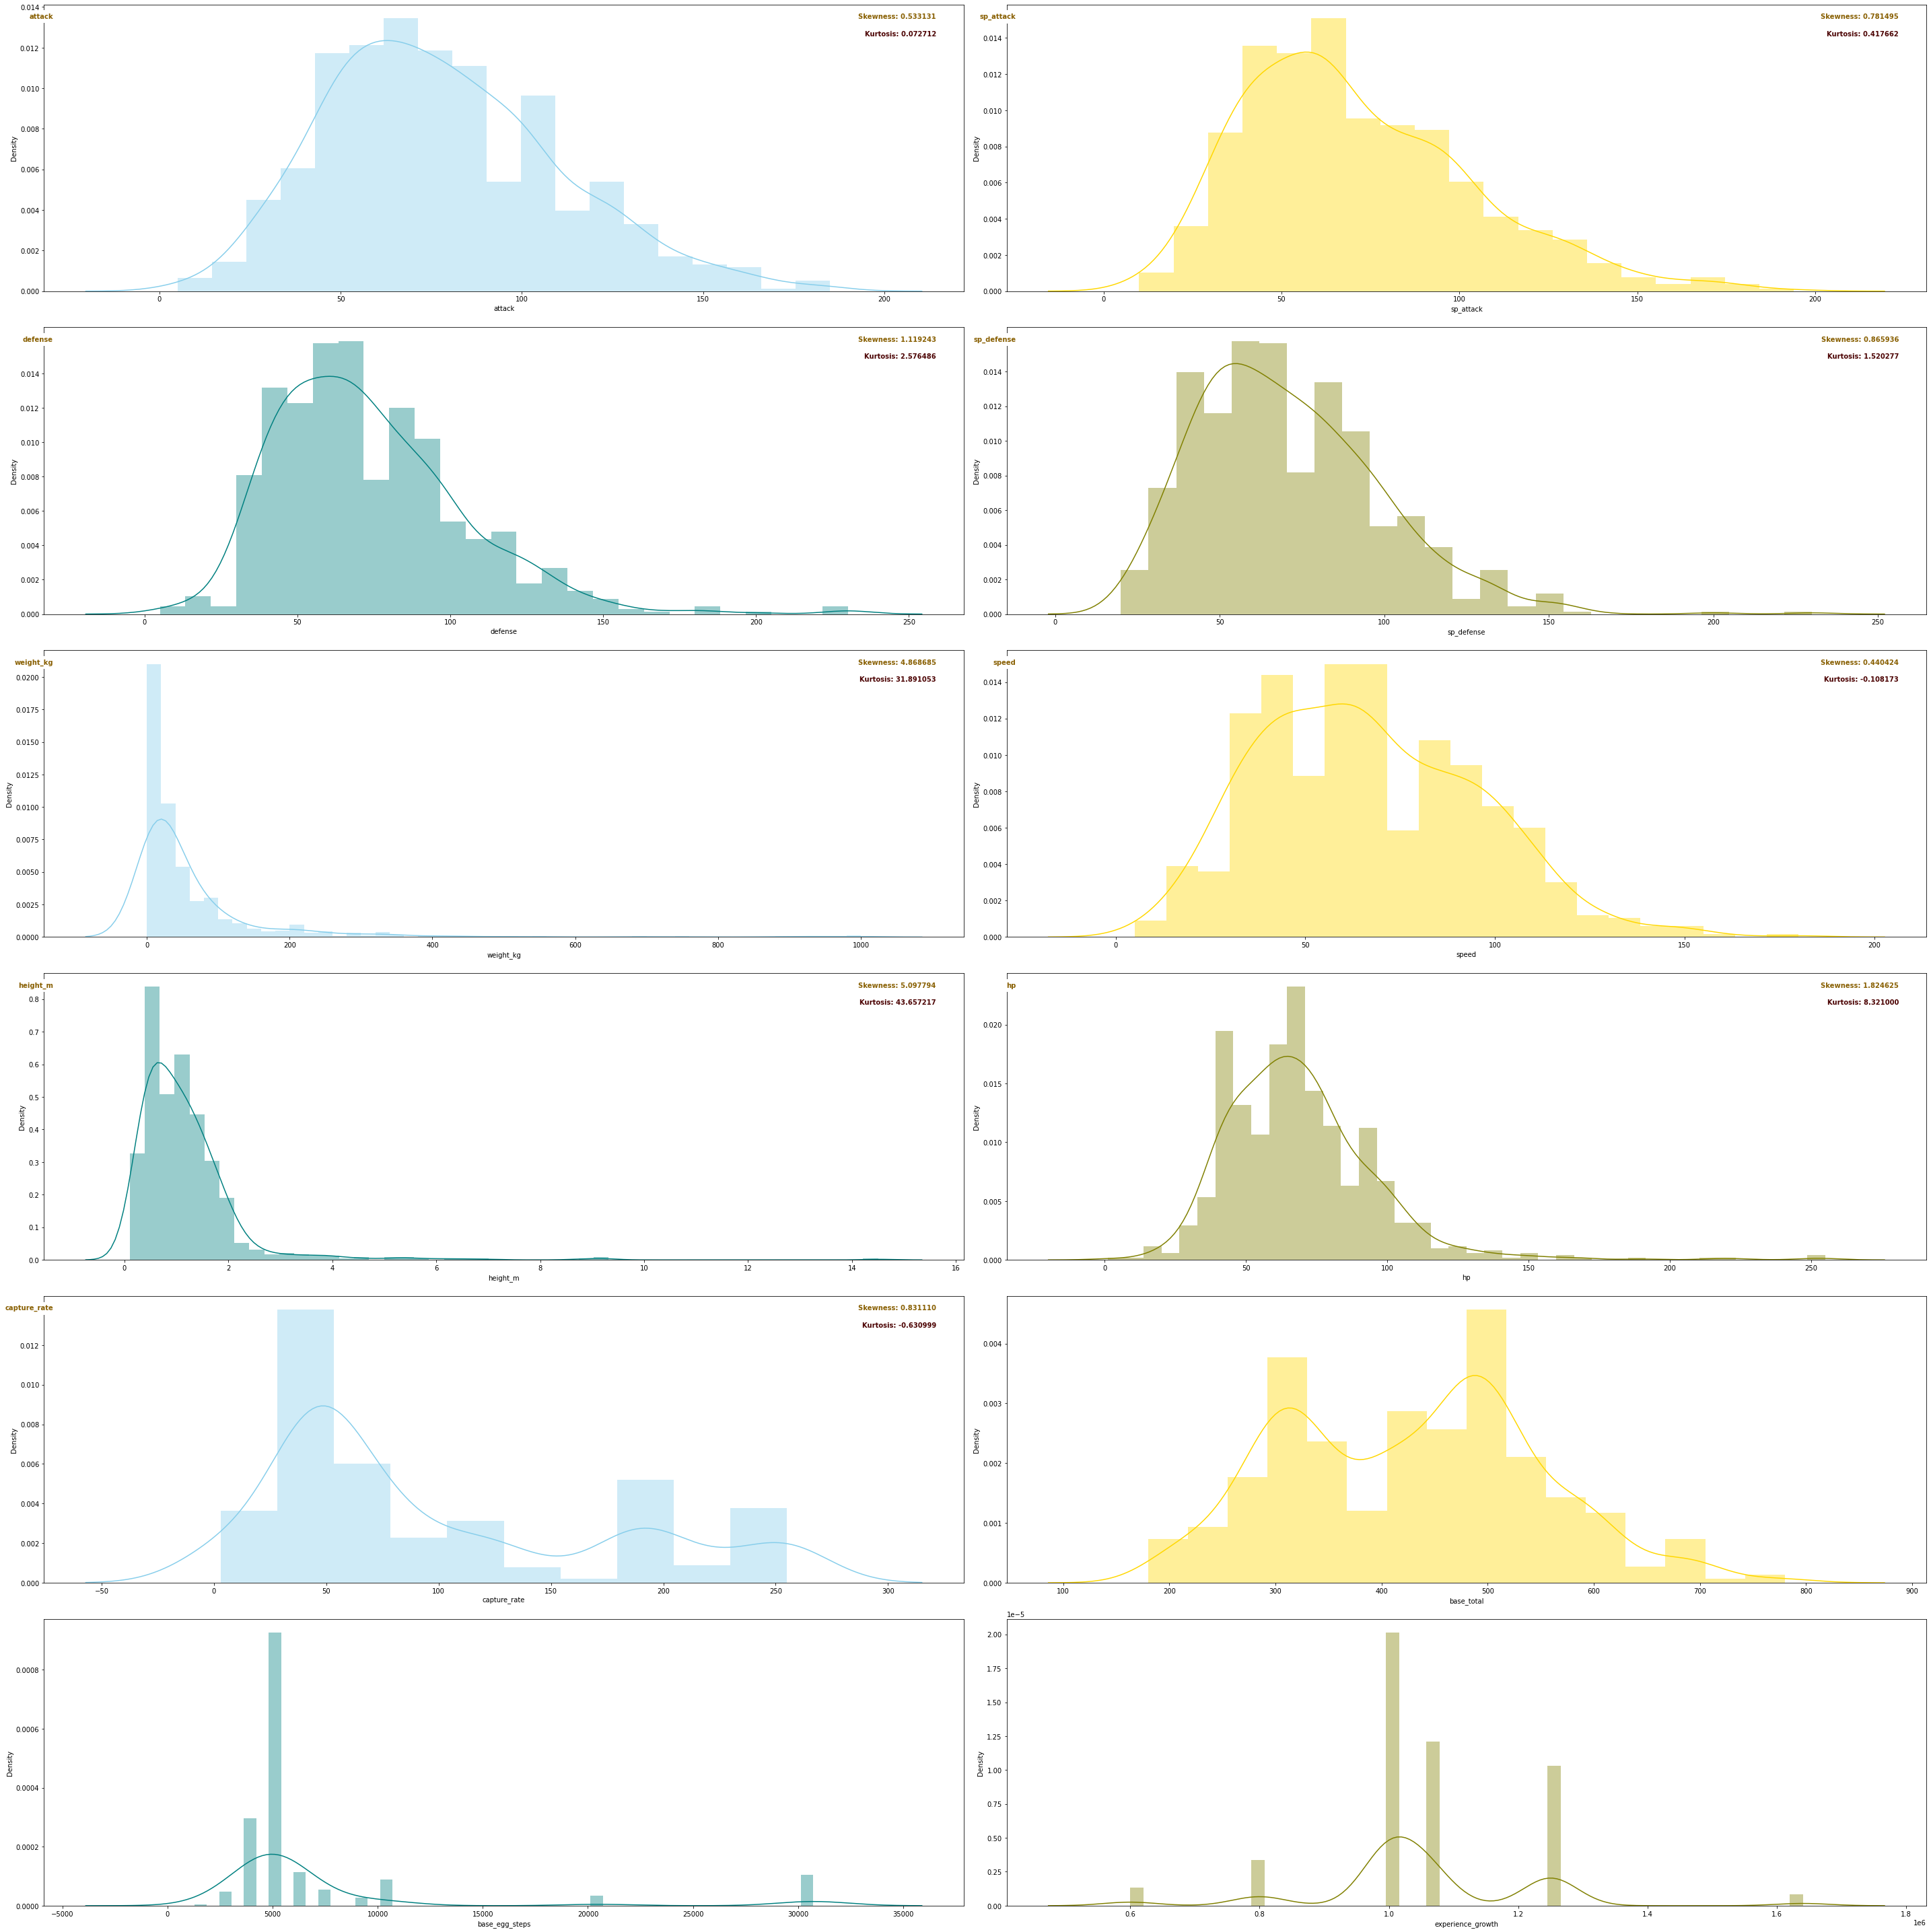

In [ ]:
def drawAndCheckSkewnessAndKurtosis(df_copy):
  colors = ["skyblue","gold","teal","olive"]
  namesOfFeatures = numeric_columns

  colorIdx = 0
  f, axes = plt.subplots(6,2,figsize=(40, 40))
  i = 0
  j = 0
  take = 0
  for feature in namesOfFeatures:
      sns.distplot(df_copy[feature], color=colors[colorIdx%4], ax=axes[i,j])
      if j >= 1: 
          i+=1
          j=0
      else: 
          j+=1
      colorIdx+=1

  for i, ax in enumerate(axes.reshape(-1)):
    if(i >= 9):
      continue
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df_copy.iloc[:,i].skew(),\
          fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
          backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df_copy.iloc[:,i].kurt(),\
          fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
          backgroundcolor='white', color='xkcd:dried blood')
    ax.text(x=0.01, y=0.97, transform=ax.transAxes, s=namesOfFeatures[i],\
          fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
          backgroundcolor='white', color='xkcd:poo brown')
      
  plt.tight_layout()
drawAndCheckSkewnessAndKurtosis(df_copy[numeric_columns])

## 2.3 Check the Variance of each feature

In [ ]:
cat_columns = ['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water','generation', 'type1_dark',
       'type1_dragon', 'type1_electric', 'type1_fairy', 'type1_fighting',
       'type1_fire', 'type1_flying', 'type1_ghost', 'type1_grass',
       'type1_ground', 'type1_ice', 'type1_normal', 'type1_poison',
       'type1_psychic', 'type1_rock', 'type1_steel', 'type1_water',
       'numberOfabilities']

In [ ]:
# Checking for variables with 0.1 variance
from statistics import variance
def checkVarianceForCategoricalFeatures(dataForVisual):
  nzv=[]
  for i in dataForVisual.columns:
    if(i == 'type1'):
      continue
    if variance(dataForVisual[i]) <= 0.1 and i[0:5] != 'type1' and i != 'is_legendary':
      nzv.append(i)
  return nzv


In [ ]:
nzv = checkVarianceForCategoricalFeatures(df_copy)
nzv

['against_normal']

## 2.4 Check the multicolinearity between numerical features

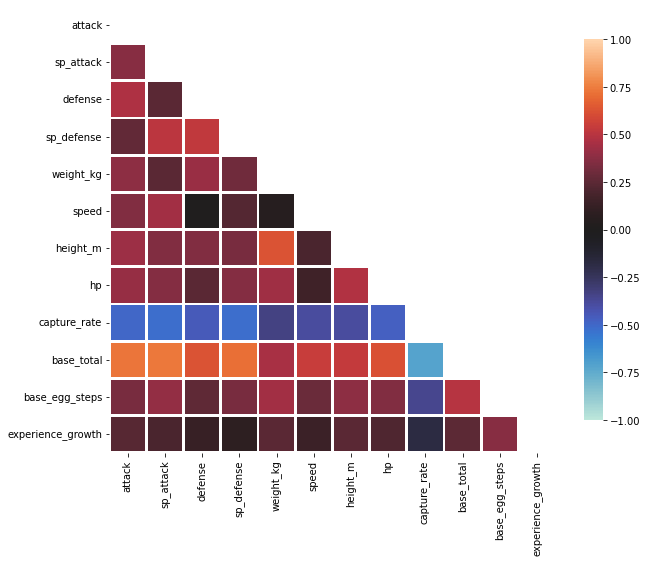

In [ ]:
corr = df_copy[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette("icefire", as_cmap=True)

sns.heatmap(corr, mask = mask, cmap = cmap, annot=False, fmt= '.2f', vmin=-1, vmax=1, square = True, linewidth=2, cbar_kws={"shrink": 0.7}, ax=ax)

In [ ]:
numeric_columns.append('is_legendary')

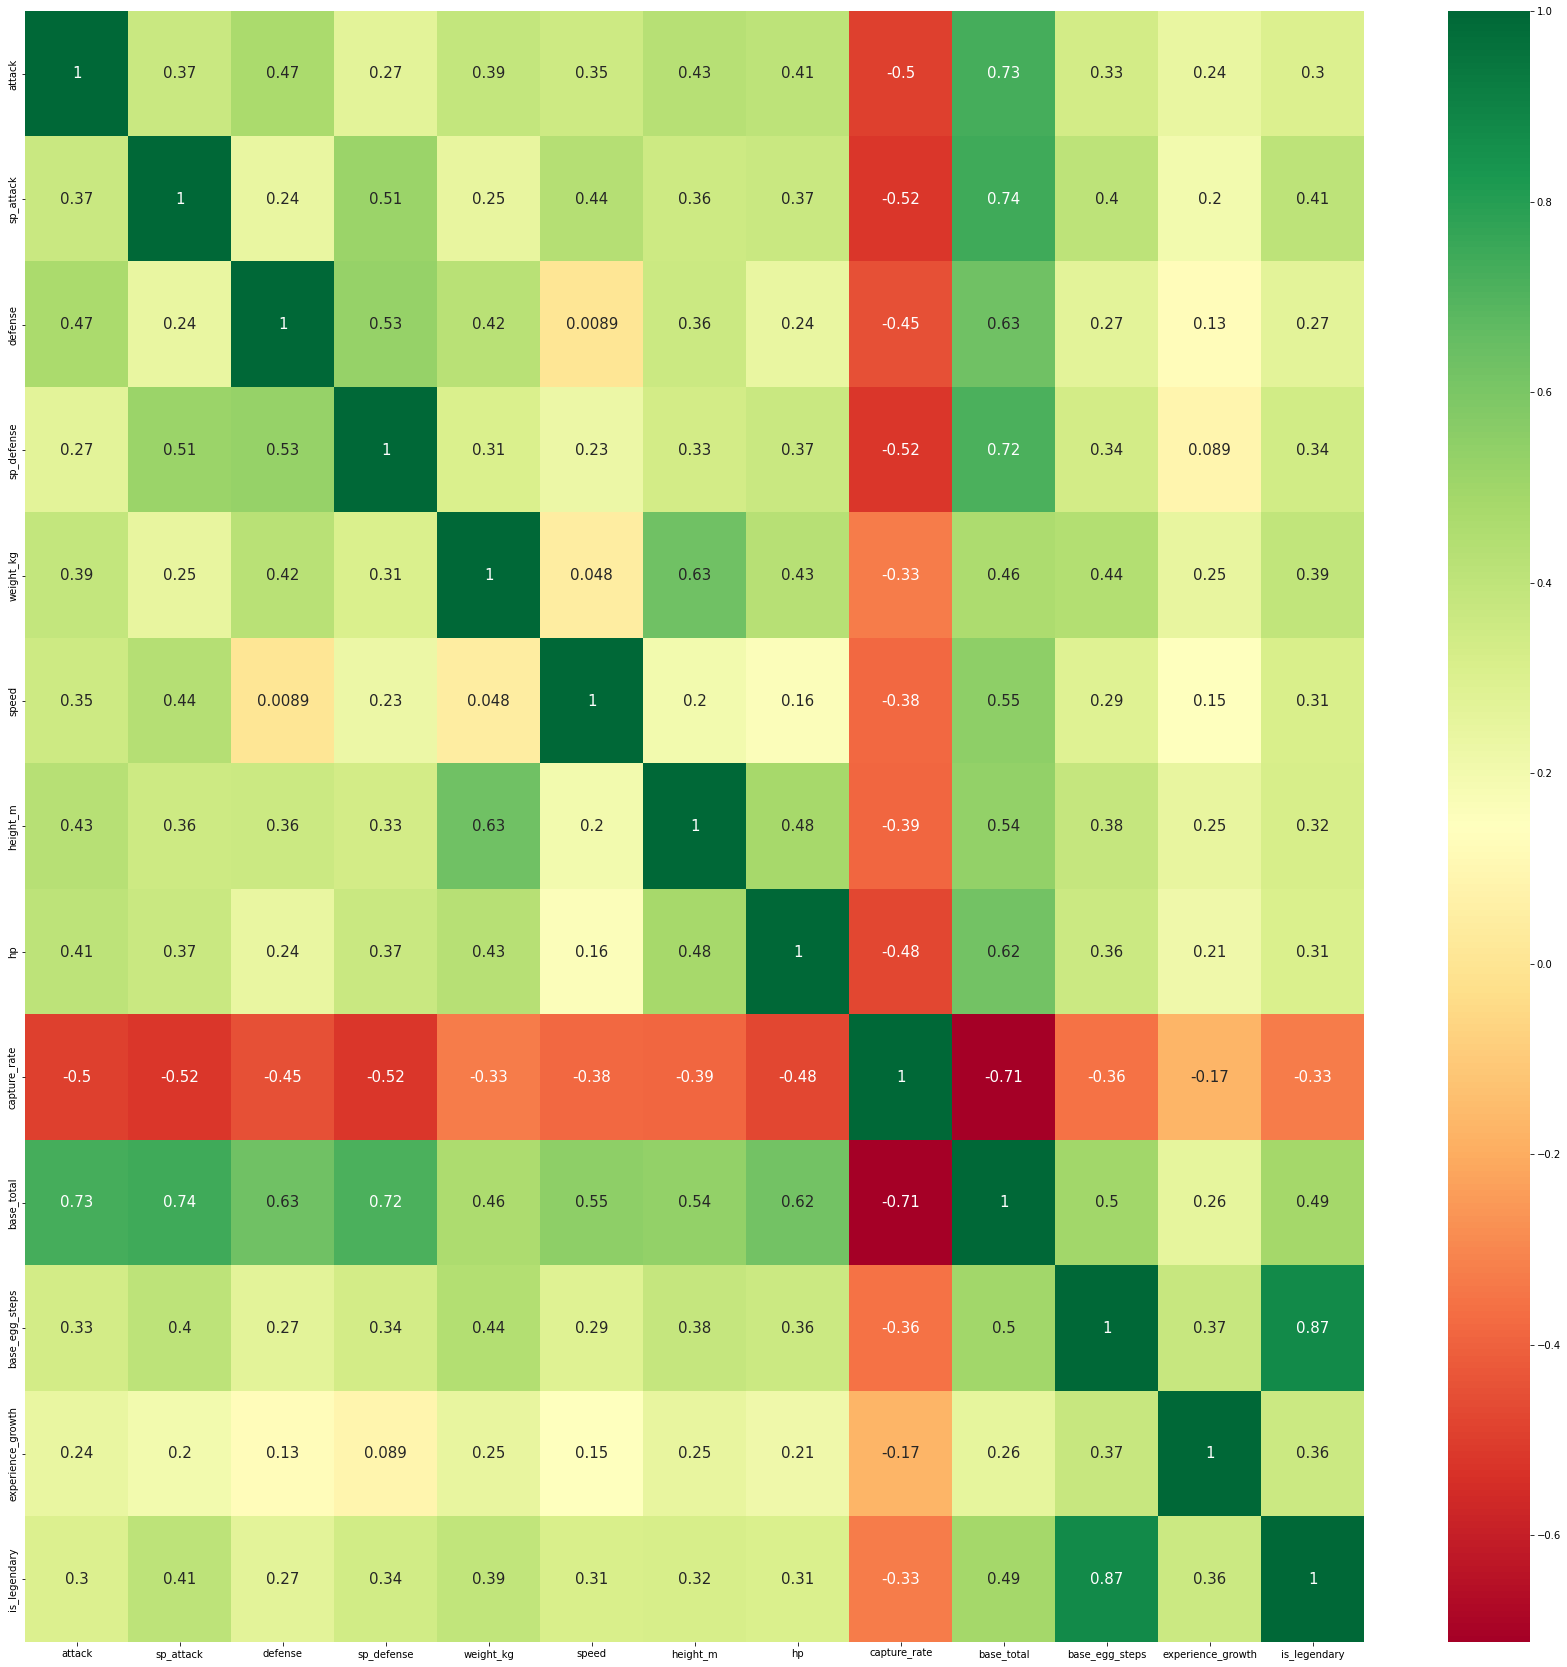

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_copy[numeric_columns].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

- We can **notice** that base_total has multi-colinearity with the majority of other numerical features. In a sense, we need to delete it. 

In [ ]:
import scipy.stats as stats
def PointBiserial(df, output = 'is_legendary'):
  IndependentFeatures = []
  for feature in numeric_columns:
    if(feature == 'is_legendary'):
      continue
    _, p_value = stats.pointbiserialr(df[output], df[feature])
    if(p_value > 0.05):
      IndependentFeatures.append(feature)
  return IndependentFeatures

IndependentFeatures = PointBiserial(df_copy)
IndependentFeatures

[]

In [ ]:
numeric_columns = ['attack',
 'sp_attack',
 'defense',
 'sp_defense',
 'weight_kg',
 'speed',
 'height_m',
 'hp',
 'capture_rate',
 'base_egg_steps',
 'experience_growth',
 'is_legendary']

<h4> Check the correlation between categorical features and dependent variables </h4>

In [ ]:
from scipy.stats import chi2_contingency
cat_cols=cat_columns
chi_statistic=[]
p_val=[]
vars_rm=[]

for i in df_copy[cat_cols]:
    observed=pd.crosstab(index=df_copy["is_legendary"], columns=df_copy[i])
    stat, p, dof, expected=chi2_contingency(observed)
    chi_statistic.append(stat)
    p_val.append(p)
    if p >= 0.05:
        print("is_legendary and {} are independent (p-value = {:.2f}).\n".format(i,p))
        vars_rm.append(i)

chi_df = pd.DataFrame()
chi_df["Variable"] = cat_cols
chi_df["Chi_Statistic"] = chi_statistic
chi_df["P_value"] = p_val
chi_df=chi_df[chi_df.P_value<0.05].sort_values("P_value", ascending=True)
display(chi_df)

is_legendary and type1_dark are independent (p-value = 0.98).

is_legendary and type1_electric are independent (p-value = 0.53).

is_legendary and type1_fairy are independent (p-value = 0.95).

is_legendary and type1_fighting are independent (p-value = 0.18).

is_legendary and type1_fire are independent (p-value = 0.98).

is_legendary and type1_flying are independent (p-value = 0.63).

is_legendary and type1_ghost are independent (p-value = 0.55).

is_legendary and type1_grass are independent (p-value = 0.33).

is_legendary and type1_ground are independent (p-value = 0.85).

is_legendary and type1_ice are independent (p-value = 0.72).

is_legendary and type1_poison are independent (p-value = 0.14).

is_legendary and type1_rock are independent (p-value = 0.85).

is_legendary and type1_water are independent (p-value = 0.21).



,Variable,Chi_Statistic,P_value
17,numberOfabilities,171.077560,6.140314e-36
13,type1_psychic,35.612711,2.407117e-09
19,against_psychic,43.300581,3.211337e-08
20,against_dark,39.432703,5.670359e-08
21,against_ghost,35.709039,3.321209e-07
18,generation,24.576803,4.088680e-04
22,against_flying,19.897124,5.233009e-04
1,type1_dragon,8.218297,4.147011e-03
15,type1_steel,6.219192,1.263728e-02
23,against_poison,13.619641,1.821485e-02


In [ ]:
chi_df.Variable

17    numberOfabilities
13        type1_psychic
19      against_psychic
20         against_dark
21        against_ghost
18           generation
22       against_flying
1          type1_dragon
15          type1_steel
23       against_poison
24     against_electric
11         type1_normal
Name: Variable, dtype: object

- According to Chi Square Test, the dependent variables are ['type1_dark','type1_dragon', 'type1_electric', 'type1_fairy', 'type1_fighting','type1_fire', 'type1_flying', 'type1_ghost', 'type1_grass','type1_ground', 'type1_ice', 'type1_normal', 'type1_poison','type1_psychic', 'type1_rock', 'type1_steel', 'type1_water','numberOfabilities', 'generation','against_psychic',against_dark,'against_ghost','against_flying','against_poison','against_electric']

In [ ]:
cat_columns = ['numberOfabilities','type1_psychic','against_psychic','against_dark'
,'against_ghost','generation', 'against_flying','type1_dragon','type1_steel','against_poison','against_electric','type1_normal']

# 3. Handling the Outliers

### 3.1 Using LOF 

In [ ]:
df_used = df_copy.copy()

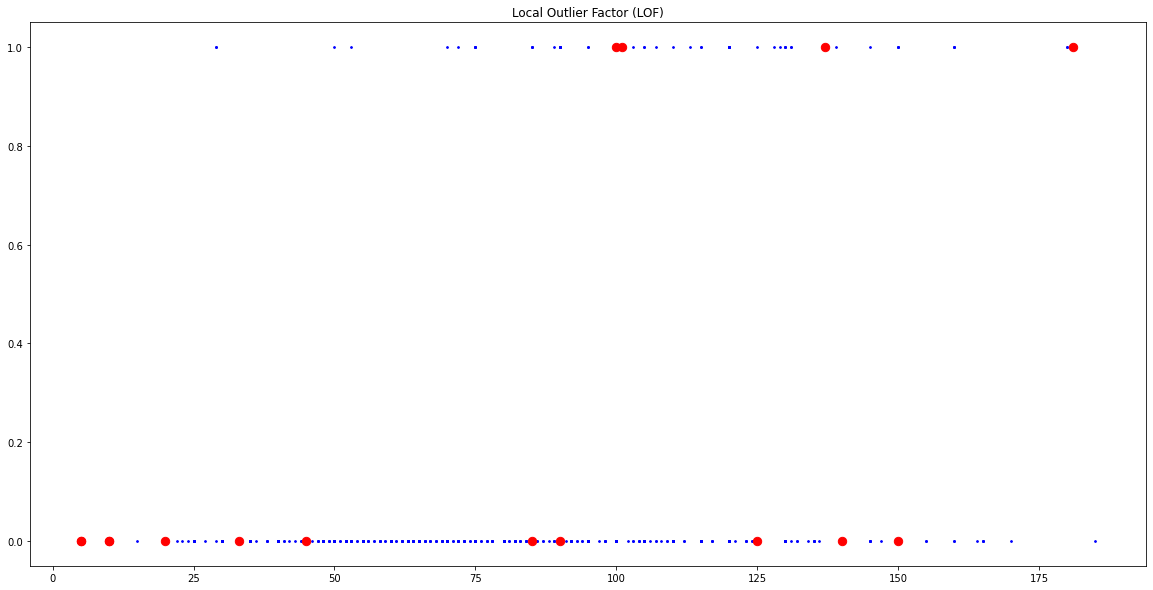

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
colsMahal = ['attack','is_legendary', 'defense', 'speed', 'hp', 'sp_attack', 'sp_defense']
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(df_used[colsMahal])

X_scores = clf.negative_outlier_factor_

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]
df_inlier = df_used[in_mask]
df_outlier = df_used[out_mask]
plt.figure(figsize=(20, 10))
plt.title("Local Outlier Factor (LOF)")

plt.scatter(df_inlier['attack'], df_inlier['is_legendary'], color="b", s=3.0, label="Data points")
plt.scatter(df_outlier['attack'], df_outlier['is_legendary'], color="r", s=70.0, label="Data points")

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

In [ ]:
x = np.percentile(radius, 99)
x
df_used['radius'] = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
print(df_used[df_used['radius']>x].shape)
df_used[df_used['radius']>x].head()

(8, 53)


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water,numberOfabilities,type1,radius
14,0.5,1.0,1.0,1.0,0.5,0.25,2.0,2.0,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,bug,0.568765
62,2.0,2.0,1.0,1.0,1.0,0.50,1.0,1.0,2.0,1.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,psychic,0.581972
112,1.0,1.0,1.0,1.0,1.0,2.00,1.0,1.0,0.0,1.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,normal,0.864659
212,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,bug,0.975745
241,1.0,1.0,1.0,1.0,1.0,2.00,1.0,1.0,0.0,1.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,normal,1.000000


## 3.2 Using Isolation Forests

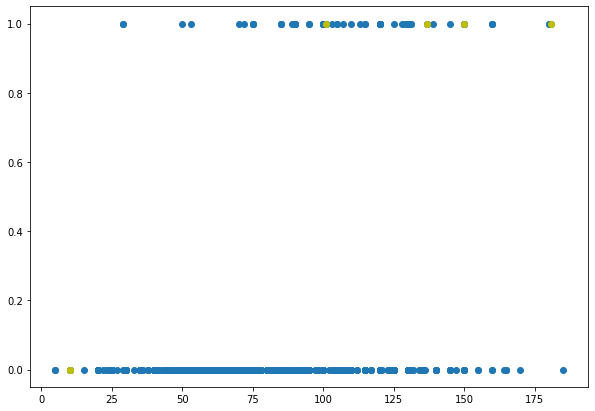

In [ ]:
# Isolation Forests
from sklearn.datasets import make_blobs
from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

IF = IsolationForest(n_estimators=100, contamination = 0.0075, n_jobs=4, random_state=42)
cols = ['attack','is_legendary', 'defense', 'speed', 'hp', 'sp_attack', 'sp_defense']
predictions = IF.fit_predict(df_used[cols]) 

#the scikit learn api would mark outliers with a -1 for us
#let's extract them and plot them 
outlier_index = where(predictions==-1)
values = df_used.iloc[outlier_index]
plt.figure(figsize=(10, 7)) 
plt.scatter(df_used['attack'], df_used['is_legendary'])
plt.scatter(values['attack'], values['is_legendary'], color='y')

In [ ]:
print(len(np.array(outlier_index).reshape(-1, 1)))

6


In [ ]:
outlier_index

(array([149, 212, 241, 793, 796, 797]),)

In [ ]:
df_used['IFR'] =  1 #Not outlier
for idx in outlier_index:
  df_used.iloc[idx,-1] = -1 # outlier

# 4. Data PreProcessing

## 4.1 Deleting the unnecessary features 

- According to chiSquare test and Section 2, I used Forward Feature Engineering to choose the best ones.

In [ ]:
df_used.drop('type1',inplace = True, axis = 1)
#Drop against_normal
df_used.drop('against_normal',inplace = True, axis = 1)
#Drop base_total 
# df_used.drop('base_total',inplace = True, axis = 1)

In [ ]:
total_features = []
for feature in df_copy.columns: 
  if(feature in cat_columns or feature in numeric_columns):
    total_features.append(feature)

In [ ]:
# total_features.append('is_legendary')

In [ ]:
total_features.append('radius')
total_features.append('IFR')

In [ ]:
df_filtered = df_used[total_features]

In [ ]:
df_filtered

,against_dark,against_electric,against_flying,against_ghost,against_poison,against_psychic,attack,base_egg_steps,capture_rate,defense,...,weight_kg,generation,is_legendary,type1_dragon,type1_normal,type1_psychic,type1_steel,numberOfabilities,radius,IFR
0,1.0,0.5,2.0,1.0,1.0,2.0,49.0,5120.0,45.0,49.0,...,6.9,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.032329,1
1,1.0,0.5,2.0,1.0,1.0,2.0,62.0,5120.0,45.0,63.0,...,13.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.033262,1
2,1.0,0.5,2.0,1.0,1.0,2.0,100.0,5120.0,45.0,123.0,...,100.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.088846,1
3,1.0,1.0,1.0,1.0,1.0,1.0,52.0,5120.0,45.0,43.0,...,8.5,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.011940,1
4,1.0,1.0,1.0,1.0,1.0,1.0,64.0,5120.0,45.0,58.0,...,19.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.012698,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.0,2.0,0.5,1.0,0.0,0.5,101.0,30720.0,25.0,103.0,...,999.9,7.0,1.0,0.0,0.0,0.0,1.0,1.0,0.035552,1
796,1.0,0.5,1.0,1.0,0.0,0.5,181.0,30720.0,255.0,131.0,...,0.1,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.452956,-1
797,0.5,0.5,1.0,0.5,1.0,0.0,101.0,30720.0,15.0,53.0,...,888.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.551477,-1
798,2.0,1.0,1.0,2.0,1.0,0.5,107.0,30720.0,3.0,101.0,...,230.0,7.0,1.0,0.0,0.0,1.0,0.0,1.0,0.034717,1


## 4.2 Solving the problem of Skewness

In [ ]:
numeric_columns = ['attack',
 'sp_attack',
 'defense',
 'sp_defense',
 'weight_kg',
 'speed',
 'height_m',
 'hp',
 'capture_rate',
 'base_egg_steps',
 'experience_growth']

In [ ]:
# # Check for variables with skew above 0.75
# skew_limit = 0.75
# skew_vals = df_filtered[numeric_columns].skew()
# skew_cols = (skew_vals
#              .sort_values(ascending=False)
#              .to_frame()
#              .rename(columns={0:'Skew'})
#              .query('abs(Skew) > {}'.format(skew_limit)))

# display(skew_cols.style.set_caption('Columns to be log-transformed:'))

# # Log-transform skewed variables
# for i in skew_cols.index.values:
#     df_filtered[i] = df_filtered[i].apply(np.log1p)

,Skew
height_m,5.097794
weight_kg,4.868685
base_egg_steps,2.953545
hp,1.824625
defense,1.119243
sp_defense,0.865936
capture_rate,0.831110
sp_attack,0.781495


# 5.Feature Engineering

In [ ]:
df_filtered['bmi']=df_filtered.apply(lambda x: x['weight_kg']/(x['height_m']**2),axis=1)
df_filtered['bmi']

0      14.081633
1      13.000000
2      25.000000
3      23.611111
4      15.702479
         ...    
795    11.813563
796     1.111111
797    29.355372
798    39.930556
799    80.500000
Name: bmi, Length: 800, dtype: float64

In [ ]:
df_experiment1 = df_filtered[df_filtered['radius'] < 0.9]
Y_experiment1 = df_experiment1['is_legendary']

df_experiment1.drop('radius',inplace = True, axis = 1)
df_experiment1.drop('IFR',inplace = True, axis = 1)
df_experiment1.drop('is_legendary',inplace = True, axis = 1)


In [ ]:
df_experiment2 = df_filtered[df_filtered['IFR'] == 1]
Y_experiment2 = df_experiment2['is_legendary']

df_experiment2.drop('radius',inplace = True, axis = 1)
df_experiment2.drop('IFR',inplace = True, axis = 1)
df_experiment2.drop('is_legendary',inplace = True, axis = 1)


In [ ]:
#Scaling 
#Scaling The data 
from sklearn.preprocessing import StandardScaler

def scaling(df):
  scale = StandardScaler()
  x_scaled = scale.fit_transform(np.array(df))
  return x_scaled

#6.Training the Models

## 6.1 Logistic Regression

In [ ]:
#Split the data 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

def logisticRegression(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred =  clf.predict(X_test)
    print(classification_report(y_test, y_pred))
  


<h3> Without Scaling </h3>

In [ ]:
logisticRegression(df_experiment1,Y_experiment1)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       141
         1.0       1.00      0.89      0.94        19

    accuracy                           0.99       160
   macro avg       0.99      0.95      0.97       160
weighted avg       0.99      0.99      0.99       160



In [ ]:
logisticRegression(df_experiment2,Y_experiment2)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       142
         1.0       1.00      0.82      0.90        17

    accuracy                           0.98       159
   macro avg       0.99      0.91      0.95       159
weighted avg       0.98      0.98      0.98       159



<h3> With Scaling </h3>

In [ ]:
logisticRegression(scaling(df_experiment1), Y_experiment1)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       141
         1.0       1.00      0.84      0.91        19

    accuracy                           0.98       160
   macro avg       0.99      0.92      0.95       160
weighted avg       0.98      0.98      0.98       160



In [ ]:
logisticRegression(scaling(df_experiment2), Y_experiment2)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       142
         1.0       1.00      0.88      0.94        17

    accuracy                           0.99       159
   macro avg       0.99      0.94      0.97       159
weighted avg       0.99      0.99      0.99       159



**Conclusion** : we can notice that logistic regression without scaling under LOF gives the best results. In this sense, let's use other than this with different Techniques

## 6.2 Naive Bayes

In [ ]:
from sklearn.naive_bayes import CategoricalNB
def NaiveBayes(X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  clf = CategoricalNB()
  clf.fit(X, Y)
  y_pred =  clf.predict(X_test)
  print(classification_report(y_test, y_pred))


In [ ]:
NaiveBayes(df_experiment1, Y_experiment1)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       141
         1.0       1.00      0.89      0.94        19

    accuracy                           0.99       160
   macro avg       0.99      0.95      0.97       160
weighted avg       0.99      0.99      0.99       160



## 6.3 SVM 
- Using Cross Validation to solve the problem of imbalance data

In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.svm import SVC
def SVMs(X,Y, kernelType):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  svm_clf = SVC(kernel=kernelType)
  svm_clf.fit(X_train, y_train)
  evaluate(svm_clf, X_train, X_test, y_train, y_test)

In [ ]:
SVMs(df_experiment1,Y_experiment1, 'linear') #without crossValidation

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[141   0]
 [  1  18]]
ACCURACY SCORE:
0.9938
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.992958   1.000000   0.99375    0.996479      0.993794
recall       1.000000   0.947368   0.99375    0.973684      0.993750
f1-score     0.996466   0.972973   0.99375    0.984720      0.993677
support    141.000000  19.000000   0.99375  160.000000    160.000000


In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, df_experiment1, Y_experiment1, cv=2, scoring='accuracy') #cv is cross validation
print(scores.mean())

0.9849624060150375


### 6.3.2 Polynomial Kernels

In [ ]:
SVMs(df_experiment1,Y_experiment1, 'poly') #without crossValidation

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[141   0]
 [ 19   0]]
ACCURACY SCORE:
0.8812
CLASSIFICATION REPORT:
                  0.0   1.0  accuracy   macro avg  weighted avg
precision    0.881250   0.0   0.88125    0.440625      0.776602
recall       1.000000   0.0   0.88125    0.500000      0.881250
f1-score     0.936877   0.0   0.88125    0.468439      0.825623
support    141.000000  19.0   0.88125  160.000000    160.000000


### 6.3.3 RBF Kernel

In [ ]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, df_experiment1, Y_experiment1, cv=2, scoring='accuracy') #cv is cross validation
print(scores.mean())

0.9122807017543859


## 6.4 LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def LDA(X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  lda_0 = LinearDiscriminantAnalysis()
  lda_0.fit(X_train, y_train)
  y_test_pred_0 = lda_0.predict(X_test)
  print(confusion_matrix(y_test, y_test_pred_0))
  print(classification_report(y_test, y_test_pred_0))

In [ ]:
LDA(df_experiment1,Y_experiment1)


[[141   0]
 [  1  18]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       141
         1.0       1.00      0.95      0.97        19

    accuracy                           0.99       160
   macro avg       1.00      0.97      0.98       160
weighted avg       0.99      0.99      0.99       160



## 6.5 Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
def Bagging(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    bagging_clf = BaggingClassifier(random_state=42)
    bagging_clf.fit(X_train, y_train)
    y_test_pred_0 = bagging_clf.predict(X_test)
    print(confusion_matrix(y_test, y_test_pred_0))
    print(classification_report(y_test, y_test_pred_0))

In [ ]:
Bagging(df_experiment1,Y_experiment1)

[[141   0]
 [  3  16]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       141
         1.0       1.00      0.84      0.91        19

    accuracy                           0.98       160
   macro avg       0.99      0.92      0.95       160
weighted avg       0.98      0.98      0.98       160



## 6.6 Random Forests 
- I did parameter tuning by myself


In [ ]:
from sklearn.ensemble import RandomForestClassifier

def RandomForests(X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
  rf_clf = RandomForestClassifier(n_estimators=200, bootstrap=True
                                      )
  rf_clf.fit(X_train, y_train)
  evaluate(rf_clf, X_train, X_test, y_train, y_test)


In [ ]:
RandomForests(df_experiment1,Y_experiment1)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[140   0]
 [  3  17]]
ACCURACY SCORE:
0.9812
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.979021   1.000000   0.98125    0.989510      0.981643
recall       1.000000   0.850000   0.98125    0.925000      0.981250
f1-score     0.989399   0.918919   0.98125    0.954159      0.980589
support    140.000000  20.000000   0.98125  160.000000    160.000000


## 6.7 Xgboost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def XGboost(X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, random_state=0).fit(X_train, y_train)
  evaluate(clf, X_train, X_test, y_train, y_test)

In [ ]:
XGboost(df_experiment1, Y_experiment1)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[141   0]
 [  3  16]]
ACCURACY SCORE:
0.9812
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.979167   1.000000   0.98125    0.989583      0.981641
recall       1.000000   0.842105   0.98125    0.921053      0.981250
f1-score     0.989474   0.914286   0.98125    0.951880      0.980545
support    141.000000  19.000000   0.98125  160.000000    160.000000


# 7. Balancing the Data

## 7.1 Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# instantiating the random over sampler 
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(df_experiment1, Y_experiment1)

# new class distribution 
print(Counter(y_ros))

Counter({0.0: 728, 1.0: 728})


In [ ]:
logisticRegression(X_ros,y_ros)

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       148
         1.0       0.95      0.88      0.91       144

    accuracy                           0.92       292
   macro avg       0.92      0.92      0.92       292
weighted avg       0.92      0.92      0.92       292



In [ ]:
NaiveBayes(X_ros,y_ros)

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       148
         1.0       0.99      1.00      1.00       144

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



In [ ]:
SVMs(X_ros,y_ros, 'linear') #without crossValidation

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[133  15]
 [  0 144]]
ACCURACY SCORE:
0.9486
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    1.000000    0.905660   0.94863    0.952830      0.953476
recall       0.898649    1.000000   0.94863    0.949324      0.948630
f1-score     0.946619    0.950495   0.94863    0.948557      0.948531
support    148.000000  144.000000   0.94863  292.000000    292.000000


In [ ]:
LDA(X_ros,y_ros) #without crossValidation

[[146   2]
 [  3 141]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       148
         1.0       0.99      0.98      0.98       144

    accuracy                           0.98       292
   macro avg       0.98      0.98      0.98       292
weighted avg       0.98      0.98      0.98       292



In [ ]:
Bagging(X_ros,y_ros)

[[147   1]
 [  0 144]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       148
         1.0       0.99      1.00      1.00       144

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



In [ ]:
RandomForests(X_ros,y_ros)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[150   1]
 [  0 141]]
ACCURACY SCORE:
0.9966
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    1.000000    0.992958  0.996575    0.996479      0.996599
recall       0.993377    1.000000  0.996575    0.996689      0.996575
f1-score     0.996678    0.996466  0.996575    0.996572      0.996576
support    151.000000  141.000000  0.996575  292.000000    292.000000


In [ ]:
XGboost(X_ros,y_ros)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[148   0]
 [  0 144]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
             0.0    1.0  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    148.0  144.0       1.0      292.0         292.0


Conclusion: 
We can notice that oversampling has lowered the accuracy a little bit, which makes sense, as the Data has 8.7% only yes, which makes the model is completely baised. In a sense, I have done random oversampling and got lowered accuracy, but it is more trusted model. 
- Without Balancing: 
  - Logistic Regression: 99
  - Naive Baeyes: 99 
  - Random Forests: 98%
  - XGboost: 98%
  - LDA: 99%
  - Bagging: 98%

- With Balancing: 
  - LogisticRegression: 92%
  - Naive Bays:100%
  - RandomForests: 99.66%
  - Bagging: 100%
  -XGeboost: 100%
  - LDA: 98%

# 8. References: 
I depended on my implementation and this link only.
- https://www.kaggle.com/code/sayansh001/pokemon-advanced-eda-visualization